In [1]:
%pylab inline
import ROOT
import root_numpy
import pandas as pd
import glob
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyAmsUtils import tree_to_frame

In [3]:
filenames = sorted(glob.glob("/data/13*.root"), key=os.path.getmtime)[:-1]
#filenames = ["/root/AMSDeutons/test.root"]

In [4]:
filenames

['/data/1385801337.00000001.ntuple.root']

In [5]:
def get_frame(f):
    tfile = ROOT.TFile(f)
    tree  = tfile.Get("selections")
    return tree_to_frame(tree) 
    
data = pd.concat([get_frame(f) for f in filenames])

<ROOT.TFile object ("/data/1385801337.00000001.ntuple.root") at 0x1259a30> <ROOT.TTree object ("selections") at 0x2bc5040>


In [7]:
data

,Run,Event,UTime,JMDCTime,ThetaS,PhiS,Livetime,Latitude,Rcutoff,PhysBPatt,fStatus,selStatus,R
0,1385801337,1,1385801336,1.385801e+09,0.000014,2.852277,0.000000,0.127100,-14.828423,3,1161928807687393549,354431,0.000000
1,1385801337,2,1385801336,1.385801e+09,0.000015,2.852278,0.000000,0.127099,-0.000000,96,563121752309858,1036519439,0.000000
2,1385801337,3,1385801336,1.385801e+09,0.000016,2.852278,0.001058,0.127098,11.497494,3,1648317490134003997,524287,2.131232
3,1385801337,4,1385801336,1.385801e+09,0.000019,2.852280,0.004232,0.127095,-22.082912,1,2891310965560803098,889994431,0.076026
4,1385801337,5,1385801336,1.385801e+09,0.000019,2.852280,0.004232,0.127095,17.124006,7,1279022424037266697,485439,0.000000
5,1385801337,6,1385801336,1.385801e+09,0.000021,2.852281,0.006347,0.127093,40.129036,81,3612872081780211321,936148159,-0.251658
6,1385801337,7,1385801336,1.385801e+09,0.000024,2.852284,0.010579,0.127089,-14.539487,3,1161928807152627981,392447,-0.055868
7,1385801337,8,1385801336,1.385801e+09,0.000026,2.852285,0.012695,0.127087,-11.983906,81,1279040127626517577,346175,0.000000
8,1385801337,9,1385801336,1.385801e+09,0.000033,2.852290,0.021159,0.127079,-0.000000,96,17729629587522,2063,0.000000
9,1385801337,10,1385801336,1.385801e+09,0.000036,2.852293,0.025390,0.127074,14.934690,3,1648317490134007069,523695,0.250960


In [8]:
pattcounts = data['PhysBPatt'].map(lambda x:np.binary_repr(x,8)).value_counts()

# Counts (linear scale)

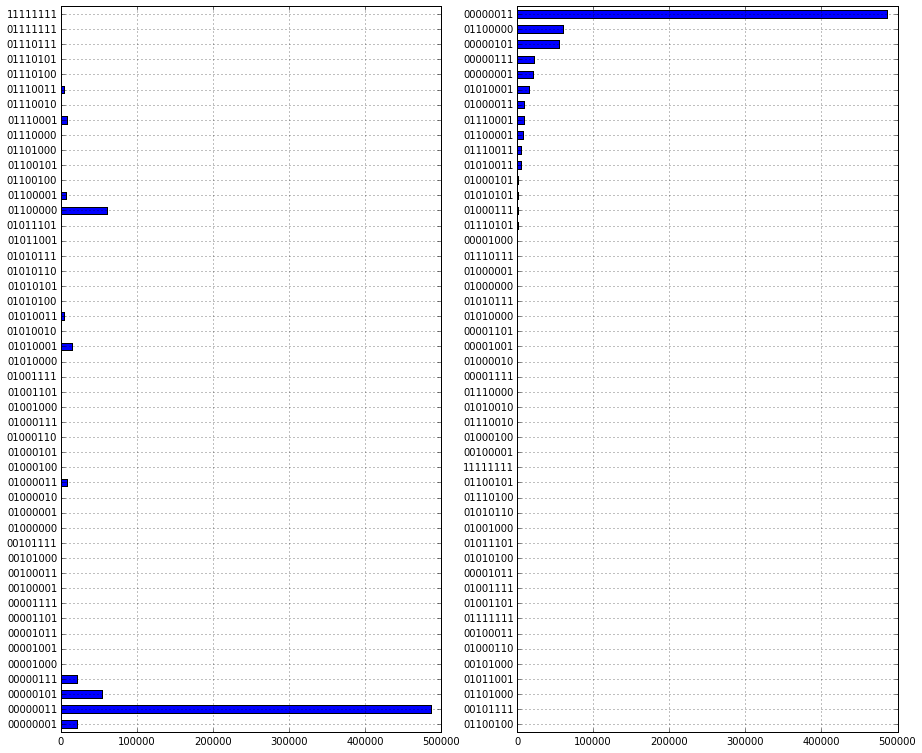

In [9]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh')
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh')

#Counts (Log scale)

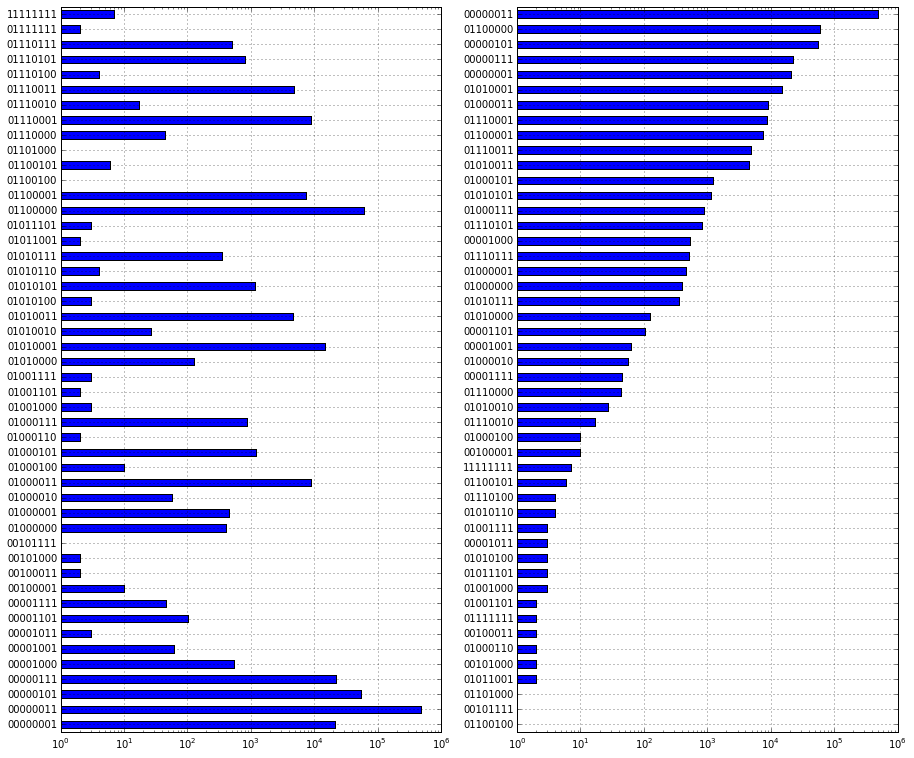

In [10]:
figsize(15,13)
subplot(121);pattcounts.sort_index().plot(kind='barh', logx=True)
subplot(122);pattcounts.sort(ascending=True); pattcounts.plot(kind='barh', logx=True)

In [15]:
data['PhysBPatt'].astype(uint32).value_counts()

3             486828
96             60796
5              55061
7              22197
1              21206
81             15050
67              8982
113             8774
97              7513
115             4824
83              4613
69              1221
85              1162
71               883
117              815
8                537
119              511
65               460
64               405
87               356
80               127
13               104
9                 62
66                57
15                46
112               44
82                27
114               17
68                10
33                10
4294967295         7
101                6
86                 4
116                4
72                 3
79                 3
84                 3
93                 3
11                 3
127                2
35                 2
40                 2
70                 2
89                 2
77                 2
47                 1
100                1
104          